In [1]:
import os
import math
import random
import pandas
import matplotlib.pyplot as pyplot

try:
    data = pandas.read_csv("./resources/winequality-red.csv", sep=';')
except EnvironmentError:
    print("Data not found")

# V.1 Exploring the green reds
a) Write a function that will plot a scatterplot matrix of your red wine data

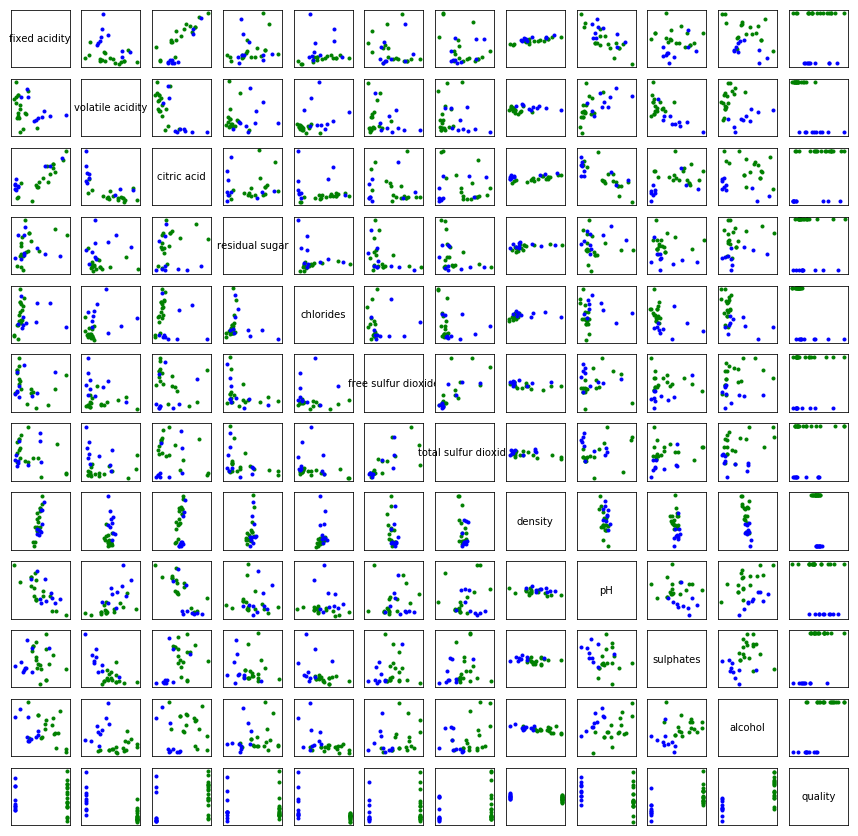

In [2]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    #Create as many subplots as there are values
    values = wine_data.shape
    tr, axes = pyplot.subplots(nrows=values[1], ncols=values[1], figsize=(15,15))

    #Remove the axis labels
    for a in axes.flat:
        a.xaxis.set_visible(False)
        a.yaxis.set_visible(False)

    #Add the labels
    i = 0
    for name in wine_data.columns:
        axes[i, i].annotate(name, (0.5, 0.5), ha="center", va="center")
        i = i + 1

    #Find the values in the good and bad thresholds
    good = []
    bad = []
    for i in range(values[0]):
        current = []
        for j in wine_data:
            current.append(wine_data[j][i])
        if wine_data["quality"][i] >= good_threshold:
            good.append(current)
        elif wine_data["quality"][i] <= bad_threshold:
            bad.append(current)

    #Add values to bottom left and top right
    for i in range(values[1]):
        for j in range(i + 1, values[1]):
            for g in good:
                axes[i, j].scatter(g[i], g[j], marker='.', c=['g'])
                axes[j, i].scatter(g[j], g[i], marker='.', c=['g'])
            for b in bad:
                axes[i, j].scatter(b[i], b[j], marker='.', c=['b'])
                axes[j, i].scatter(b[j], b[i], marker='.', c=['b'])

    if save_plot:
        pyplot.savefig("./scatter_matrix.png")
    return tr
pyplot.show(plot_scatter_matrix(data, 8, 3, save_plot=True))

b) Now that you’ve had a chance to analyze different chemical factors in red wines and
their relationship with high scores (8 or higher) and low scores (3 or lower), which
factors do you think will be most useful to your perceptron for distinguishing high
quality vs. low quality wines? Why?

*Wine factors such as alcohol content, volatile acidity, and sulphates will work well at distinguishing wines. Those factors have clear groups that allow perceptrons to easily find classification groups.*

# V.2 Learning to perceptron
a) Implement a perceptron that:
- Has randomly initialized weights and bias
- Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
- Utilizes the heaviside step activation function (discrete version)

b) You'll need to implement a function to train your perception. Your training function should take in your red wine data as a parameter and should:
- Have a way to specify number of training epochs
- Train your perceptron until it makes no errors, if training epochs is set to 0
- Have a way to specify learning rate.
- Return a list of python tuples containing (performance)

c) Now that you have a perceptron, a way to train your perceptron, and some data, you need a way to confirm that your perceptron actually works. Write a function that will take the output of your perceptron training function and your red wine data and generate two plots in one figure:
- The first plot should plot the number of errors your perceptron made as a function of epoch. Be careful with how you calculate errors!
- The second plot should plot the decision boundary of your perceptron and also show ‘good’ and ‘bad’ wine data points on the final training epoch. This second plot should also shade ‘good’ and ‘bad’ areas!
- Your function should allow the user to specify a specific epoch and see what the decision boundary of the perceptron was on that epoch.  If a negative epoch is given, cause the plots to show the last epoch

d) Your perceptron appears to work. . . but why is it taking so many epochs to train? Maybe you can modify the red wine data to help the perceptron learn more quickly?

# V.3 My Fair ADALINE
a) Marvin notices and chides you for torturing your perceptron. Why?

You decide to upgrade your perceptron to handle this harder classification task. You’ve
heard a bit about the gradient descent technique and also about ADALINE, maybe these
will do the trick?

b) Implement an ADALINE that:
- Has randomly initialized weights and bias
- Uses a linear activation function and some kind of quantizer
- Uses the Widrow-Hoff learning rule

c) You’ll need to implement a function to train your ADALINE. Your training function
should:
- Take in your red wine data as a parameter
- Have a way to specify number of training epochs
- If training epochs is set to 0, your ADALINE should train until it converges on a good set of weights.
- Have a way to specify learning rate.
- Have an option to perform either online learning or batch learning

d) Find a good learning rate for your ADALINE and plot number of classification errors vs. epoch and the decision boundary of your ADALINE. What settings tend to give the smallest number of classification errors? Support your reasoning with example plots!

# V.4 Advanced wine sampling and resampling
a) Write a function that uses the holdout method to partition the red wine data into a training and a validation set. The function should take a parameter to adjust the proportion of training to validation data. It should return a tuple containing:

(training_pandas_dataframe, cross_validation_pandas_dataframe)

b) Write a function that generates a k-fold cross-validation dataset from the red wine data. The function should allow k to be arbitrarily adjusted and also have an op-tional setting to shuffle data before creating k-folds. The function should return a list of ‘k’ tuples with each tuple containing:

(training_pandas_dataframe, cross_validation_pandas_dataframe)

c) What effects does changing learning rate and number of training epochs have on the ADALINE when evaluated via k-fold cross-validation? To address this question, you should write (or modify) a function that will train and assess the ADALINE on each training and cross-validation fold produced by your k-fold function.

# V.5 Adventures in the Nth dimension
a) Try training your perceptron/ADALINE with different numbers and types of chemical factors. Under what circumstances can your perceptron/ADALINE successfully train?

b) You know what the decision boundary for 2 wine chemical factors looks like, but what does the decision boundary for 3 factors look like? What about if you use 7 factors? How about if you use all 11 wine chemical factors?

# V.6 Marvin's rebuttal
a) While not a wine. . . find a way to successfully classify the Pan-Galactic Gargle Blaster dataset. Show that your perceptron or ADALINE successfully classifies the Pan Galactic Gargle Blaster data set by plotting the decision boundary and also show ‘good’ and ‘bad’ Gargle Blaster data points.